# Block 6: Non-Linear Modeling

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_json('../data/cars.json')

# Filter dataframe
required_cols = ['Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration', 'Origin']

# only include rows where ALL columns are not nan
ix_included = np.sum(pd.isna(df[required_cols]), axis=1) == 0

# exclude examples with no horsepower or mpg
print("Before: ", df.shape)
df = df[ix_included]
print("After: ", df.shape)

Before:  (406, 9)
After:  (392, 9)


In [106]:
def optimize(X, y, eta, steps, scaling=1):

    # z-score (NxK - 1xK) / 1xK = NxK
    X = (X - np.mean(X, axis=0)[None, :]) / (scaling * np.std(X, axis=0)[None, :])

    # add a column of ones
    ones_col = np.ones((X.shape[0], 1)) # Nx1
    X = np.hstack((ones_col, X))
    
    # randomly initialize solution 
    Beta = np.random.randn(X.shape[1]) # K
    
    # iterate for steps
    history = []

    for i in range(steps):
        # compute model predictions
        z = X @ Beta # N
        f = np.exp(z) # N
        mse = np.mean(np.square(f - y))
        history.append([Beta, mse])
        
        # compute gradient at those predictions
        # (NxK).T @ N = K

        # compute G matrix
        # NxK * Nx1 = NxK
        G = X * f[:, None] # NxK
        
        Beta_grad = 2 * G.T @ (f - y) / G.shape[0]
        
        # update solution
        Beta = Beta - eta * Beta_grad
        
    return history 

# construct input features
numeric_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration']
X = df[numeric_features].to_numpy()
dummies = pd.get_dummies(df['Origin']).to_numpy().astype(float)
X = np.hstack((X, dummies))

# scaling her is important because of the exponential activation
# if you set it to one, it will either go to nan, or you will need to use a 
# really small learning rate which won't converge quickly enough
history = optimize(X, df.Miles_per_Gallon.to_numpy(), 0.001, 1000, scaling=10)
final_p, final_mse = history[-1]
print(final_p)
print(final_mse)

[ 3.09926754  0.6742752  -2.23435758 -1.6250277  -0.42077653 -0.28069568
 -0.71681301 -0.49007702 -0.78422209]
15.655073692615886


[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


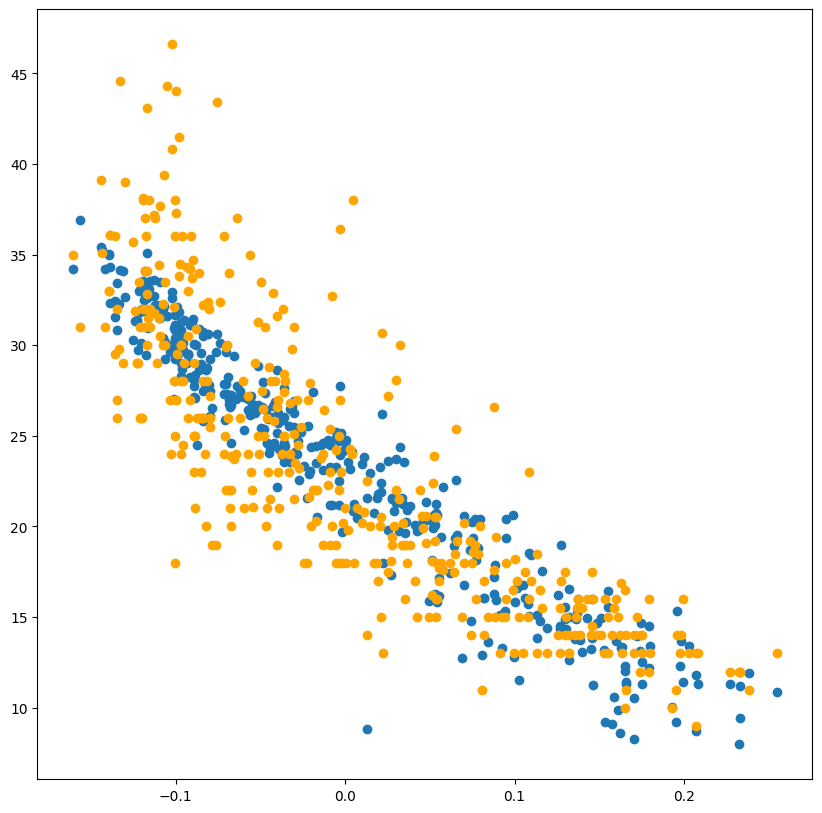

In [107]:
def plot(X, k, y, Beta, scaling=1):
    # z-score (NxK - 1xK) / 1xK = NxK
    X = (X - np.mean(X, axis=0)[None, :]) / (scaling*np.std(X, axis=0)[None, :])
    print(np.std(X, axis=0))
    # add a column of ones
    ones_col = np.ones((X.shape[0], 1)) # Nx1
    X = np.hstack((ones_col, X))
    Beta = final_p

    # compute model predictions
    z = X @ Beta # N
    f = np.exp(z) # N
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.plot(X[:,k], f, marker='o', linestyle='')
    ax.plot(X[:,k], y, marker='o', color='orange', linestyle='')

# plot some variables
plot(X, 4, df.Miles_per_Gallon.to_numpy(), final_p, scaling=10)